## DATASET STATISTICS
How to improve data based upon its metrics?

In [27]:
# STATISTICS ABOUT DATASETS

import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

from keras.models import load_model
from keras import losses
import keras.backend as K

import librosa
import librosa.display

# iPython specific stuff
import IPython.display
from ipywidgets import interact, interactive, fixed

In [28]:
data = np.load('piano_notes_dataset.npz')
notes = data['notes_mags']
phases = data['notes_phases']

In [7]:
# pick a note
note = notes[30]
phase = phases[30]

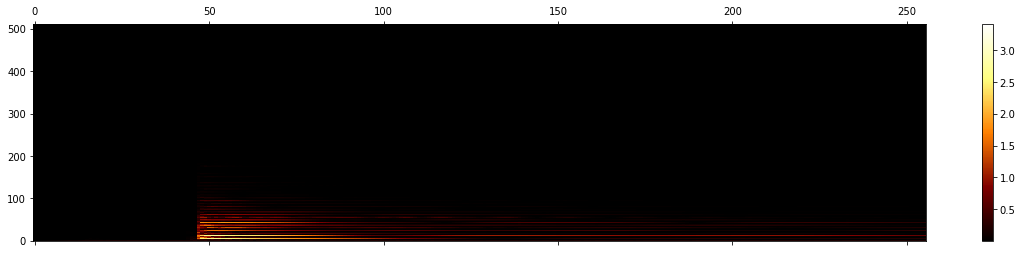

In [8]:
# plot the notes
#note= np.reshape(a=note,newshape=[513,1024*len(note)])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
cax = ax.matshow(note, interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)

In [29]:
print('PIANO NOTES DATASET')
print('(single tones)')
print('MEAN:', np.mean(notes))
print('VARIANCE:', np.var(notes))
print('STD:', np.std(notes))

PIANO NOTES DATASET
(single tones)
MEAN: 0.00735269
VARIANCE: 0.00472736
STD: 0.0687558


In [ ]:
dataset = np.load('spectra_dataset.npz','r')
spectra = dataset['spectra']

In [ ]:
print('CLASSICAL RECORDINGS DATASET')
print('(complex sounds)')
print('MEAN:', np.mean(spectra))
print('VARIANCE:', np.var(spectra))
print('STD:', np.std(spectra))

In [31]:
data = np.load('flute_notes_dataset.npz')
notes = data['notes_mags']
phases = data['notes_phases']

In [32]:
print('FLUTE NOTES DATASET')
print('(single tones)')
print('MEAN:', np.mean(notes))
print('VARIANCE:', np.var(notes))
print('STD:', np.std(notes))

FLUTE NOTES DATASET
(single tones)
MEAN: 0.0869701
VARIANCE: 0.0925091
STD: 0.304153


In [33]:
data = np.load('clarinet_notes_dataset.npz')
notes = data['notes_mags']
phases = data['notes_phases']

In [34]:
print('CLARINET NOTES DATASET')
print('(single tones)')
print('MEAN:', np.mean(notes))
print('VARIANCE:', np.var(notes))
print('STD:', np.std(notes))

CLARINET NOTES DATASET
(single tones)
MEAN: 0.054409
VARIANCE: 0.0645413
STD: 0.25405


### ABOUT RECONSTRUCTION

### Using estimate of the phase

In [25]:
import IPython.display

# Algorithm
D = np.expm1(note)
p = (2*np.pi) * np.random.random_sample(D.shape) # Start with a random estimate
p -= np.pi
for i in range(100): # Do 10 iterations
    S = D * np.exp(1j*p) # Estimate the full STFT using the magnitude and the phase estimate
    y = librosa.istft(S) + 1e-6 # invert the STFT
    p = np.angle(librosa.stft(y,n_fft=1024)) # Improve the phase estimate using the new signal

In [26]:
IPython.display.Audio(data=y,rate=44100)

### Using original phase

In [23]:
D = np.expm1(note)
S = D * np.exp(1j*phase) # Estimate the full STFT using the magnitude and the original phase
y = librosa.istft(S)

In [24]:
IPython.display.Audio(data=y,rate=44100)